![Title slide](title_slide.png)

# 1. Introduction

Online news platforms rely heavily on user engagement to drive visibility, advertising revenue, and audience reach. One of the most widely used indicators of engagement is the number of times an article is shared on social media. Being able to predict an article’s popularity before publication is valuable for media companies, editors, and content strategists, yet it remains a challenging task due to the complex and often unpredictable nature of human behavior.

In this project, we formulate **a supervised regression problem** aimed at predicting the number of shares an online news article will receive. We use the **Online News Popularity dataset**, publicly available from the **UCI Machine Learning Repository** ([link](https://archive.ics.uci.edu/dataset/332/online+news+popularity)), which contains information on nearly 40,000 news articles published by *Mashable*. The dataset provides a rich set of features describing article content, sentiment, timing, and structure.

The target variable, `shares`, represents the total number of times an article was shared across multiple social media platforms. The feature set includes, among others, statistics related to word usage, sentiment polarity, presence of multimedia content, keyword metrics, and publication day. Due to the highly skewed distribution of the target variable, careful preprocessing and evaluation are required to obtain reliable and interpretable models.

The main objectives of this project are:
- To explore and preprocess the dataset in a reproducible and well-documented manner,
- To train and tune multiple regression models with different levels of complexity,
- To compare model performance using appropriate regression metrics,
- To analyze prediction errors and understand model limitations,
- To reflect on ethical considerations related to popularity-based prediction systems.

To address these objectives, we experiment with **three regression algorithms**. 

# 2. Data Preprocessing

In [ ]:
# Libraries import
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
csv_path = 'OnlineNewsPopularity.csv'

df = pd.read_csv(csv_path)
print(f'Loaded local file: {csv_path}')
display(df.head())


Loaded local file: OnlineNewsPopularity.csv


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
# Show column names cleanly
cols = df.columns.tolist()
print("Number of columns:", len(cols))
for c in cols:
    print(repr(c))

Number of columns: 61
'url'
' timedelta'
' n_tokens_title'
' n_tokens_content'
' n_unique_tokens'
' n_non_stop_words'
' n_non_stop_unique_tokens'
' num_hrefs'
' num_self_hrefs'
' num_imgs'
' num_videos'
' average_token_length'
' num_keywords'
' data_channel_is_lifestyle'
' data_channel_is_entertainment'
' data_channel_is_bus'
' data_channel_is_socmed'
' data_channel_is_tech'
' data_channel_is_world'
' kw_min_min'
' kw_max_min'
' kw_avg_min'
' kw_min_max'
' kw_max_max'
' kw_avg_max'
' kw_min_avg'
' kw_max_avg'
' kw_avg_avg'
' self_reference_min_shares'
' self_reference_max_shares'
' self_reference_avg_sharess'
' weekday_is_monday'
' weekday_is_tuesday'
' weekday_is_wednesday'
' weekday_is_thursday'
' weekday_is_friday'
' weekday_is_saturday'
' weekday_is_sunday'
' is_weekend'
' LDA_00'
' LDA_01'
' LDA_02'
' LDA_03'
' LDA_04'
' global_subjectivity'
' global_sentiment_polarity'
' global_rate_positive_words'
' global_rate_negative_words'
' rate_positive_words'
' rate_negative_words'
' avg_

The dataset contains **61 variables**, including one target variable (`shares`) and a rich set of features describing article content, metadata, publication timing, and sentiment. For clarity, the features are grouped into meaningful categories below.


#### 1. Identifiers and Non-Predictive Features

- **`url`**: URL of the article (identifier, non-predictive)
- **`timedelta`**: Number of days between article publication and dataset acquisition (non-predictive)

These variables are excluded from modeling as they do not contain information available at prediction time or do not contribute to predicting popularity.


#### 2. Content Structure and Length Features

- **`n_tokens_title`**: Number of words in the article title  
- **`n_tokens_content`**: Number of words in the article content  
- **`average_token_length`**: Average word length in the content  
- **`num_keywords`**: Number of keywords in the article metadata  

These features capture the **length and structural complexity** of the article.


#### 3. Lexical Diversity and Text Composition

- **`n_unique_tokens`**: Proportion of unique words in the content  
- **`n_non_stop_words`**: Proportion of non-stop words  
- **`n_non_stop_unique_tokens`**: Proportion of unique non-stop words  

These variables describe **lexical richness and vocabulary diversity**, which may influence reader engagement.


#### 4. Hyperlinks and Multimedia Content

- **`num_hrefs`**: Number of external links in the article  
- **`num_self_hrefs`**: Number of links to other Mashable articles  
- **`num_imgs`**: Number of images  
- **`num_videos`**: Number of embedded videos  

These features reflect **content richness and interactivity**.


#### 5. Data Channel Indicators

Binary variables indicating the article’s category:

- **`data_channel_is_lifestyle`**
- **`data_channel_is_entertainment`**
- **`data_channel_is_bus`**
- **`data_channel_is_socmed`**
- **`data_channel_is_tech`**
- **`data_channel_is_world`**

These variables capture thematic differences that may affect popularity.


#### 6. Keyword Popularity Statistics

Statistics describing the popularity of keywords associated with the article:

- **Worst-performing keywords**:  
  - `kw_min_min`, `kw_max_min`, `kw_avg_min`
- **Best-performing keywords**:  
  - `kw_min_max`, `kw_max_max`, `kw_avg_max`
- **Average keyword performance**:  
  - `kw_min_avg`, `kw_max_avg`, `kw_avg_avg`

These features summarize historical keyword performance in terms of shares.


#### 7. Self-Reference Popularity Features

- **`self_reference_min_shares`**: Minimum shares of referenced Mashable articles  
- **`self_reference_max_shares`**: Maximum shares of referenced Mashable articles  
- **`self_reference_avg_sharess`**: Average shares of referenced Mashable articles  

These variables capture **internal popularity signals** based on related content.


#### 8. Publication Timing Features

- **Weekday indicators**:  
  - `weekday_is_monday`, `weekday_is_tuesday`, `weekday_is_wednesday`,  
    `weekday_is_thursday`, `weekday_is_friday`, `weekday_is_saturday`, `weekday_is_sunday`
- **`is_weekend`**: Indicates whether the article was published on a weekend  

These features model **temporal effects** in content popularity.


#### 9. Topic Distribution (LDA Features)

- **`LDA_00` – `LDA_04`**: Degree of association with five latent topics derived using Latent Dirichlet Allocation (LDA)

These variables describe the **thematic composition** of the article.


#### 10. Sentiment and Subjectivity Features (Content)

- **`global_subjectivity`**: Overall text subjectivity  
- **`global_sentiment_polarity`**: Overall sentiment polarity  
- **`global_rate_positive_words`**: Proportion of positive words  
- **`global_rate_negative_words`**: Proportion of negative words  
- **`rate_positive_words`**: Proportion of positive words among non-neutral tokens  
- **`rate_negative_words`**: Proportion of negative words among non-neutral tokens  
- **Polarity statistics**:  
  - `avg_positive_polarity`, `min_positive_polarity`, `max_positive_polarity`  
  - `avg_negative_polarity`, `min_negative_polarity`, `max_negative_polarity`  

These features quantify the **emotional tone and intensity** of the article text.


#### 11. Sentiment and Subjectivity Features (Title)

- **`title_subjectivity`**: Subjectivity of the article title  
- **`title_sentiment_polarity`**: Sentiment polarity of the title  
- **`abs_title_subjectivity`**: Absolute subjectivity level of the title  
- **`abs_title_sentiment_polarity`**: Absolute sentiment polarity level of the title  

These variables focus specifically on the **emotional impact of the headline**.


#### 12. Target Variable

- **`shares`**: Number of times the article was shared on social media platforms  

This variable represents the **target** of the regression task and serves as a proxy for article popularity.

In [ ]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

In [14]:
# Basic checks
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top):\n", missing.head(10))

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Shape: (39644, 61)

Columns: ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words

The dataset consists of **39,644 observations** and **61 variables**, including one target variable (`shares`) and a rich set of numerical and categorical features describing article content, sentiment, timing and structure.  
The dataset is fully populated, simplifying preprocessing and ensuring that modeling results are not influenced by missing-data handling strategies.

# 3. Explanatory Data Analysis

### Correlation Heatmap

Let's check correlation heatmap.

In [27]:
corr_matrix = df.corr(numeric_only=True)

# Correlation with target
target_corr = corr_matrix["shares"].sort_values(ascending=False)

display(target_corr.head(10))
display(target_corr.tail(10))

shares                        1.000000
log_shares                    0.510181
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
Name: shares, dtype: float64

rate_positive_words             -0.013241
data_channel_is_tech            -0.013253
LDA_04                          -0.016622
data_channel_is_entertainment   -0.017006
min_negative_polarity           -0.019297
max_negative_polarity           -0.019300
average_token_length            -0.022007
avg_negative_polarity           -0.032029
data_channel_is_world           -0.049497
LDA_02                          -0.059163
Name: shares, dtype: float64

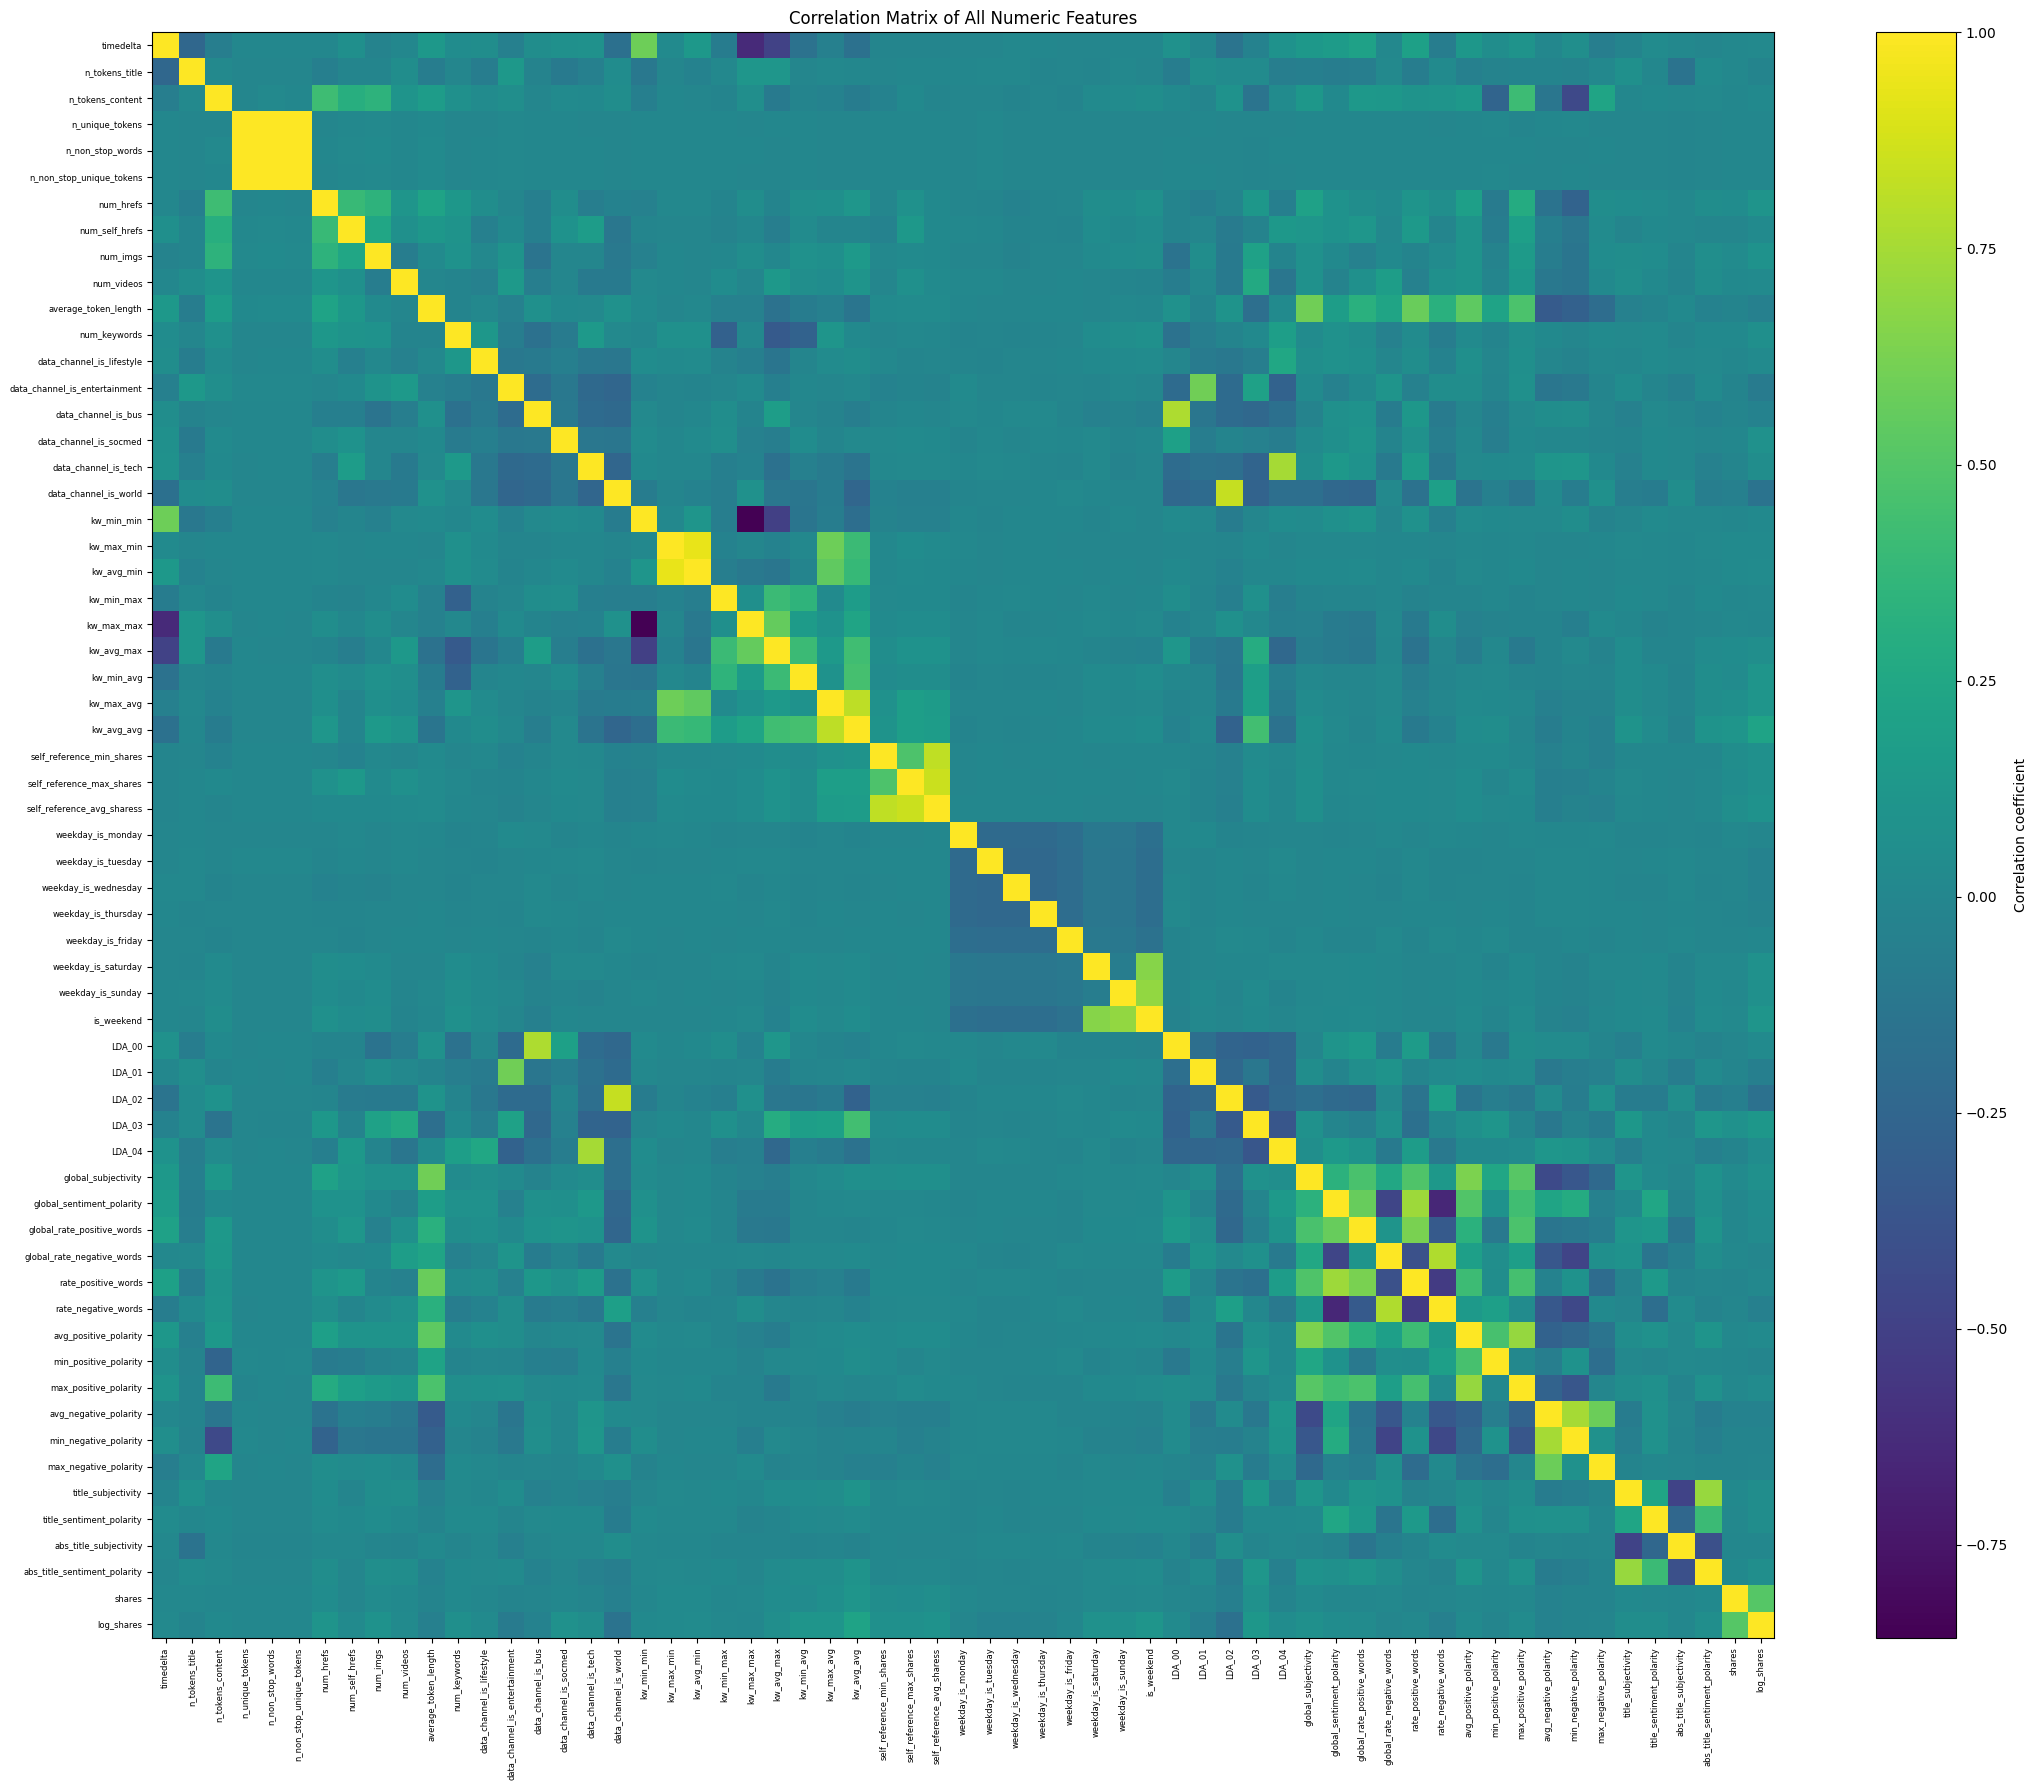

In [31]:
plt.figure(figsize=(22, 18))
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar(label="Correlation coefficient")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=6)
plt.title("Correlation Matrix of All Numeric Features")
plt.tight_layout()
plt.show()

Feature aggregation was applied to groups of highly correlated variables identified during correlation analysis. By combining redundant features into representative summary measures, multicollinearity was reduced while preserving the underlying predictive information. This approach improves model stability, interpretability and computational efficiency without relying on aggressive manual feature removal.

In [32]:
df["kw_worst_mean"] = df[["kw_min_min", "kw_max_min", "kw_avg_min"]].mean(axis=1)
df["kw_best_mean"]  = df[["kw_min_max", "kw_max_max", "kw_avg_max"]].mean(axis=1)
df["kw_avg_mean"]   = df[["kw_min_avg", "kw_max_avg", "kw_avg_avg"]].mean(axis=1)

df = df.drop(columns=[
    "kw_min_min", "kw_max_min", "kw_avg_min",
    "kw_min_max", "kw_max_max", "kw_avg_max",
    "kw_min_avg", "kw_max_avg", "kw_avg_avg"
])

In [33]:
df["self_reference_mean_shares"] = df[
    ["self_reference_min_shares",
     "self_reference_max_shares",
     "self_reference_avg_sharess"]
].mean(axis=1)

df = df.drop(columns=[
    "self_reference_min_shares",
    "self_reference_max_shares",
    "self_reference_avg_sharess"
])

In [34]:
df["content_sentiment_strength"] = (
    df["global_rate_positive_words"] +
    df["global_rate_negative_words"]
)

df["content_polarity_range"] = (
    df["max_positive_polarity"] - df["min_negative_polarity"]
)

### Target Variable Analysis

Shares is our target variable

In [13]:
# Summary of target
display(df["shares"].describe())

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

- The target variable, `shares`, displays a **highly right-skewed distribution**.
- The **median** number of shares is **1,400**, while the **mean** is substantially higher at **3,395**, indicating the presence of extreme values.
- The **standard deviation** (**11,627**) is more than three times the mean, reflecting **very high variability** in article popularity.
- The **maximum observed value** reaches **843,300 shares**, showing that a small number of articles achieve **viral popularity**, but they are perceived as outliers.
- In contrast, the majority of articles receive **relatively modest engagement**, with 75% of articles having fewer than **2,800 shares**.
- These characteristics motivate the use of a **logarithmic transformation of the target variable** in the modeling stage to reduce skewness and mitigate the influence of outliers.

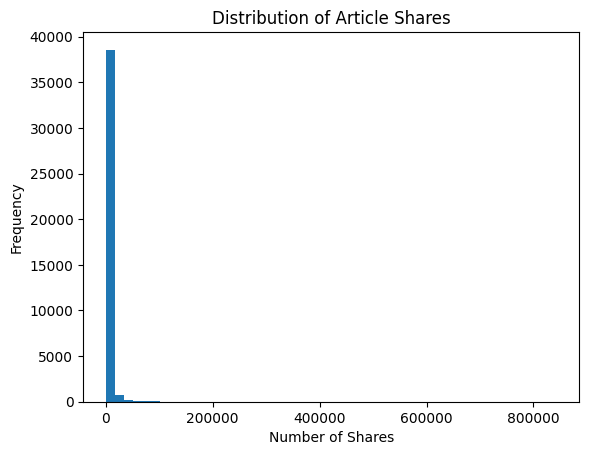

In [19]:
plt.figure()
plt.hist(df["shares"], bins=50)
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")
plt.title("Distribution of Article Shares")
plt.show()

The histogram of `shares` reveals a strongly right-skewed distribution, with most articles receiving relatively few shares and a small number of viral articles forming a long right tail. This extreme skewness causes the majority of observations to cluster near the lower end of the distribution.

For the other confirmation, the boxplot was created.

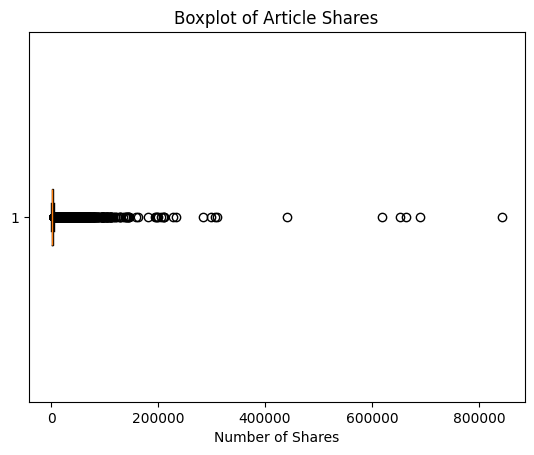

In [25]:
plt.figure()
plt.boxplot(df["shares"], vert=False)
plt.xlabel("Number of Shares")
plt.title("Boxplot of Article Shares")
plt.show()

For better readibility, the boxplot without extreme outliers was created.

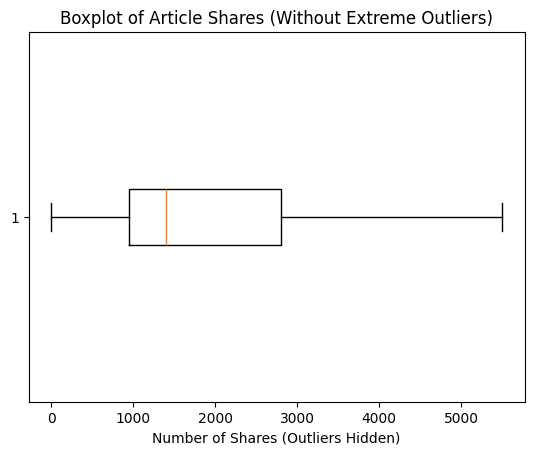

In [26]:
plt.figure()
plt.boxplot(df["shares"], vert=False, showfliers=False)
plt.xlabel("Number of Shares (Outliers Hidden)")
plt.title("Boxplot of Article Shares (Without Extreme Outliers)")
plt.show()

For the purpose of getting rid of the long right-skeweness, the logarithmization has been applied.

In [22]:
df["log_shares"] = np.log1p(df["shares"])

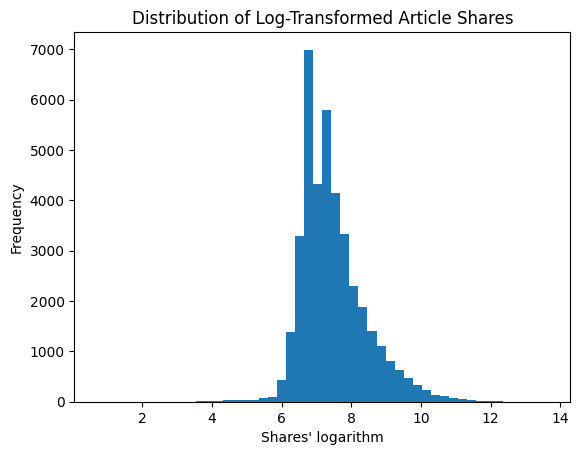

In [24]:
plt.figure()
plt.hist(df["log_shares"], bins=50)
plt.xlabel("Shares' logarithm")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Article Shares")
plt.show()

After applying a logarithmic transformation to the target variable, the distribution becomes significantly more symmetric and concentrated. The long right tail observed in the raw shares distribution is substantially reduced, indicating that the transformation effectively mitigates the influence of extreme values. This supports the use of the log-transformed target variable in subsequent regression modeling.

# 4. Modelling

test train split

# 5. Hyperparameters Tuning

# 6. Model Evaluation

# 7. Models comparison

# 8. Conclusions